In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive/


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# **Modelos de Aprendizaje Supervisado**

Los niveles obtenidos de Kmeans y Kmedoids serán las variables a explicar y pronosticar a través de los siguientes modelos: Árboles, Regresión Logística, Lasso y Naïve Bayes 

## **Árboles de decisión**

In [ ]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn import tree
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### **Kmeans**

Inicialmente, se aplicará considerando el dataset original que contiene las 92 variables

Para esto, se carga el archivo obtenido de Kmedias

In [ ]:
dffkmeans = pd.read_csv('/content/gdrive/My Drive/calidad_de_vida_medellin/github/Data/Results/R3-K-means.csv', sep=";")

Se extrae la columna donde se encuentra el nivel obtenido de kmedias

In [ ]:
dff=dffkmeans.iloc[:,0:93]
dff = dff.drop(['Unnamed: 0'], axis=1)


A este dataset se aplica la función para organizar los tipos de cada variable de acuerdo con su naturaleza

In [ ]:
def forzar_tipos(df, info, estandarizar=0):
  from sklearn.preprocessing import StandardScaler
  list_float = list(info.campo[info['tipo'] == 'float64'])
  list_obj = list(info.campo[info['tipo'] == 'object'])
  list_int =  list(info.campo[info['tipo'] == 'int64'])
  df1 = pd.DataFrame()
  df1[list_obj] = df[list_obj].astype(object)
  df1[list_float] = df[list_float].astype(float) 
  df1[list_int] = df[list_int].astype(int)
  if estandarizar == 1:
    df1[list_float] = StandardScaler().fit_transform(df1[list_float])
  return df1

In [221]:
#Función para forzar tipos, con dummies -> info_condum.csv | sin dummies -> info_sindum.csv
infoTipos = pd.read_csv('/content/gdrive/My Drive/calidad_de_vida_medellin/github/Docs/metadata_directory/info_sindum.csv', sep=';')

In [222]:
dff1=forzar_tipos(dff, infoTipos, 1)

In [223]:
dff1.head(10)

p_7 p_10 p_6 p_5 p_146 p_147  ... p_318 p_319 p_320 p_321 p_322 p_323
0   304    2   3   1     4    10  ...     4     4     4     5     4     4
1   601    2   6   1     4    10  ...     4     4     4     4     4     4
2  1606    3  16   1     4    10  ...     4     4     4     4     4     4
3  1014    2  10   1     4    10  ...     4     4     4     4     4     4
4  1609    3  16   1     4    10  ...     4     4     4     4     4     4
5  1609    4  16   1     4    10  ...     4     4     4     4     4     4
6  1619    5  16   1     4    10  ...     4     4     4     3     4     4
7   809    2   8   1     4    10  ...     4     3     4     4     4     4
8   810    2   8   1     4    10  ...     4     4     4     5     5     4
9   709    2   7   1     5    10  ...     4     4     4     4     4     4

[10 rows x 92 columns]

In [224]:
X = dff1

Asimismo, del resultado de Kmedias, se extrae la columna de clasificación

In [225]:
kml=dffkmeans.iloc[:,93:]
kml

kmeans_label
0                3
1                3
2                3
3                3
4                3
...            ...
9035             1
9036             0
9037             0
9038             1
9039             1

[9040 rows x 1 columns]

In [226]:
y = kml

In [227]:
#por defecto test = 25% de los datos
X_entrena, X_test, y_entrena, y_test = train_test_split(X,y, shuffle=False,random_state = 17, test_size=0.25)

In [228]:
arbol=DecisionTreeClassifier(random_state = 17, min_impurity_decrease=0.0005)

In [229]:
arbol.fit(X_entrena, y_entrena)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0005, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=17, splitter='best')

In [230]:
dfkm = dff1.iloc[:,:]
caracter = dfkm.columns #nombres de las features
caracter

Index(['p_7', 'p_10', 'p_6', 'p_5', 'p_146', 'p_147', 'p_148', 'p_158',
       'p_162', 'p_165', 'p_171', 'p_174', 'p_178', 'p_184', 'p_284', 'p_285',
       'p_286', 'p_12', 'p_15a', 'p_15b', 'p_19a', 'p_19b', 'p_19c', 'p_19d',
       'p_19e', 'p_20a', 'p_20b', 'p_36a', 'p_36b', 'p_44', 'p_45b', 'p_45c',
       'p_45d', 'p_45e', 'p_45f', 'p_49b', 'p_49c', 'p_66b', 'p_66c', 'p_66d',
       'p_67b', 'p_67c', 'p_68b', 'p_68c', 'p_83b', 'p_83c', 'p_83d', 'p_83e',
       'p_83f', 'p_84b', 'p_84c', 'p_84d', 'p_86a', 'p_86b', 'p_86c', 'p_86d',
       'p_86e', 'p_86f', 'p_86g', 'p_86h', 'p_125', 'p_126', 'p_157', 'p_211',
       'p_212', 'p_213', 'p_214', 'p_227', 'p_232_gp', 'p_244_ip', 'p_43a',
       'p_43b', 'p_43c', 'p_43d', 'p_258', 'p_259', 'p_260', 'p_281', 'p_282',
       'p_283', 'p_312', 'p_313', 'p_314', 'p_315', 'p_316', 'p_317', 'p_318',
       'p_319', 'p_320', 'p_321', 'p_322', 'p_323'],
      dtype='object')

In [231]:
clases= ['0','1','2','3','4','5']

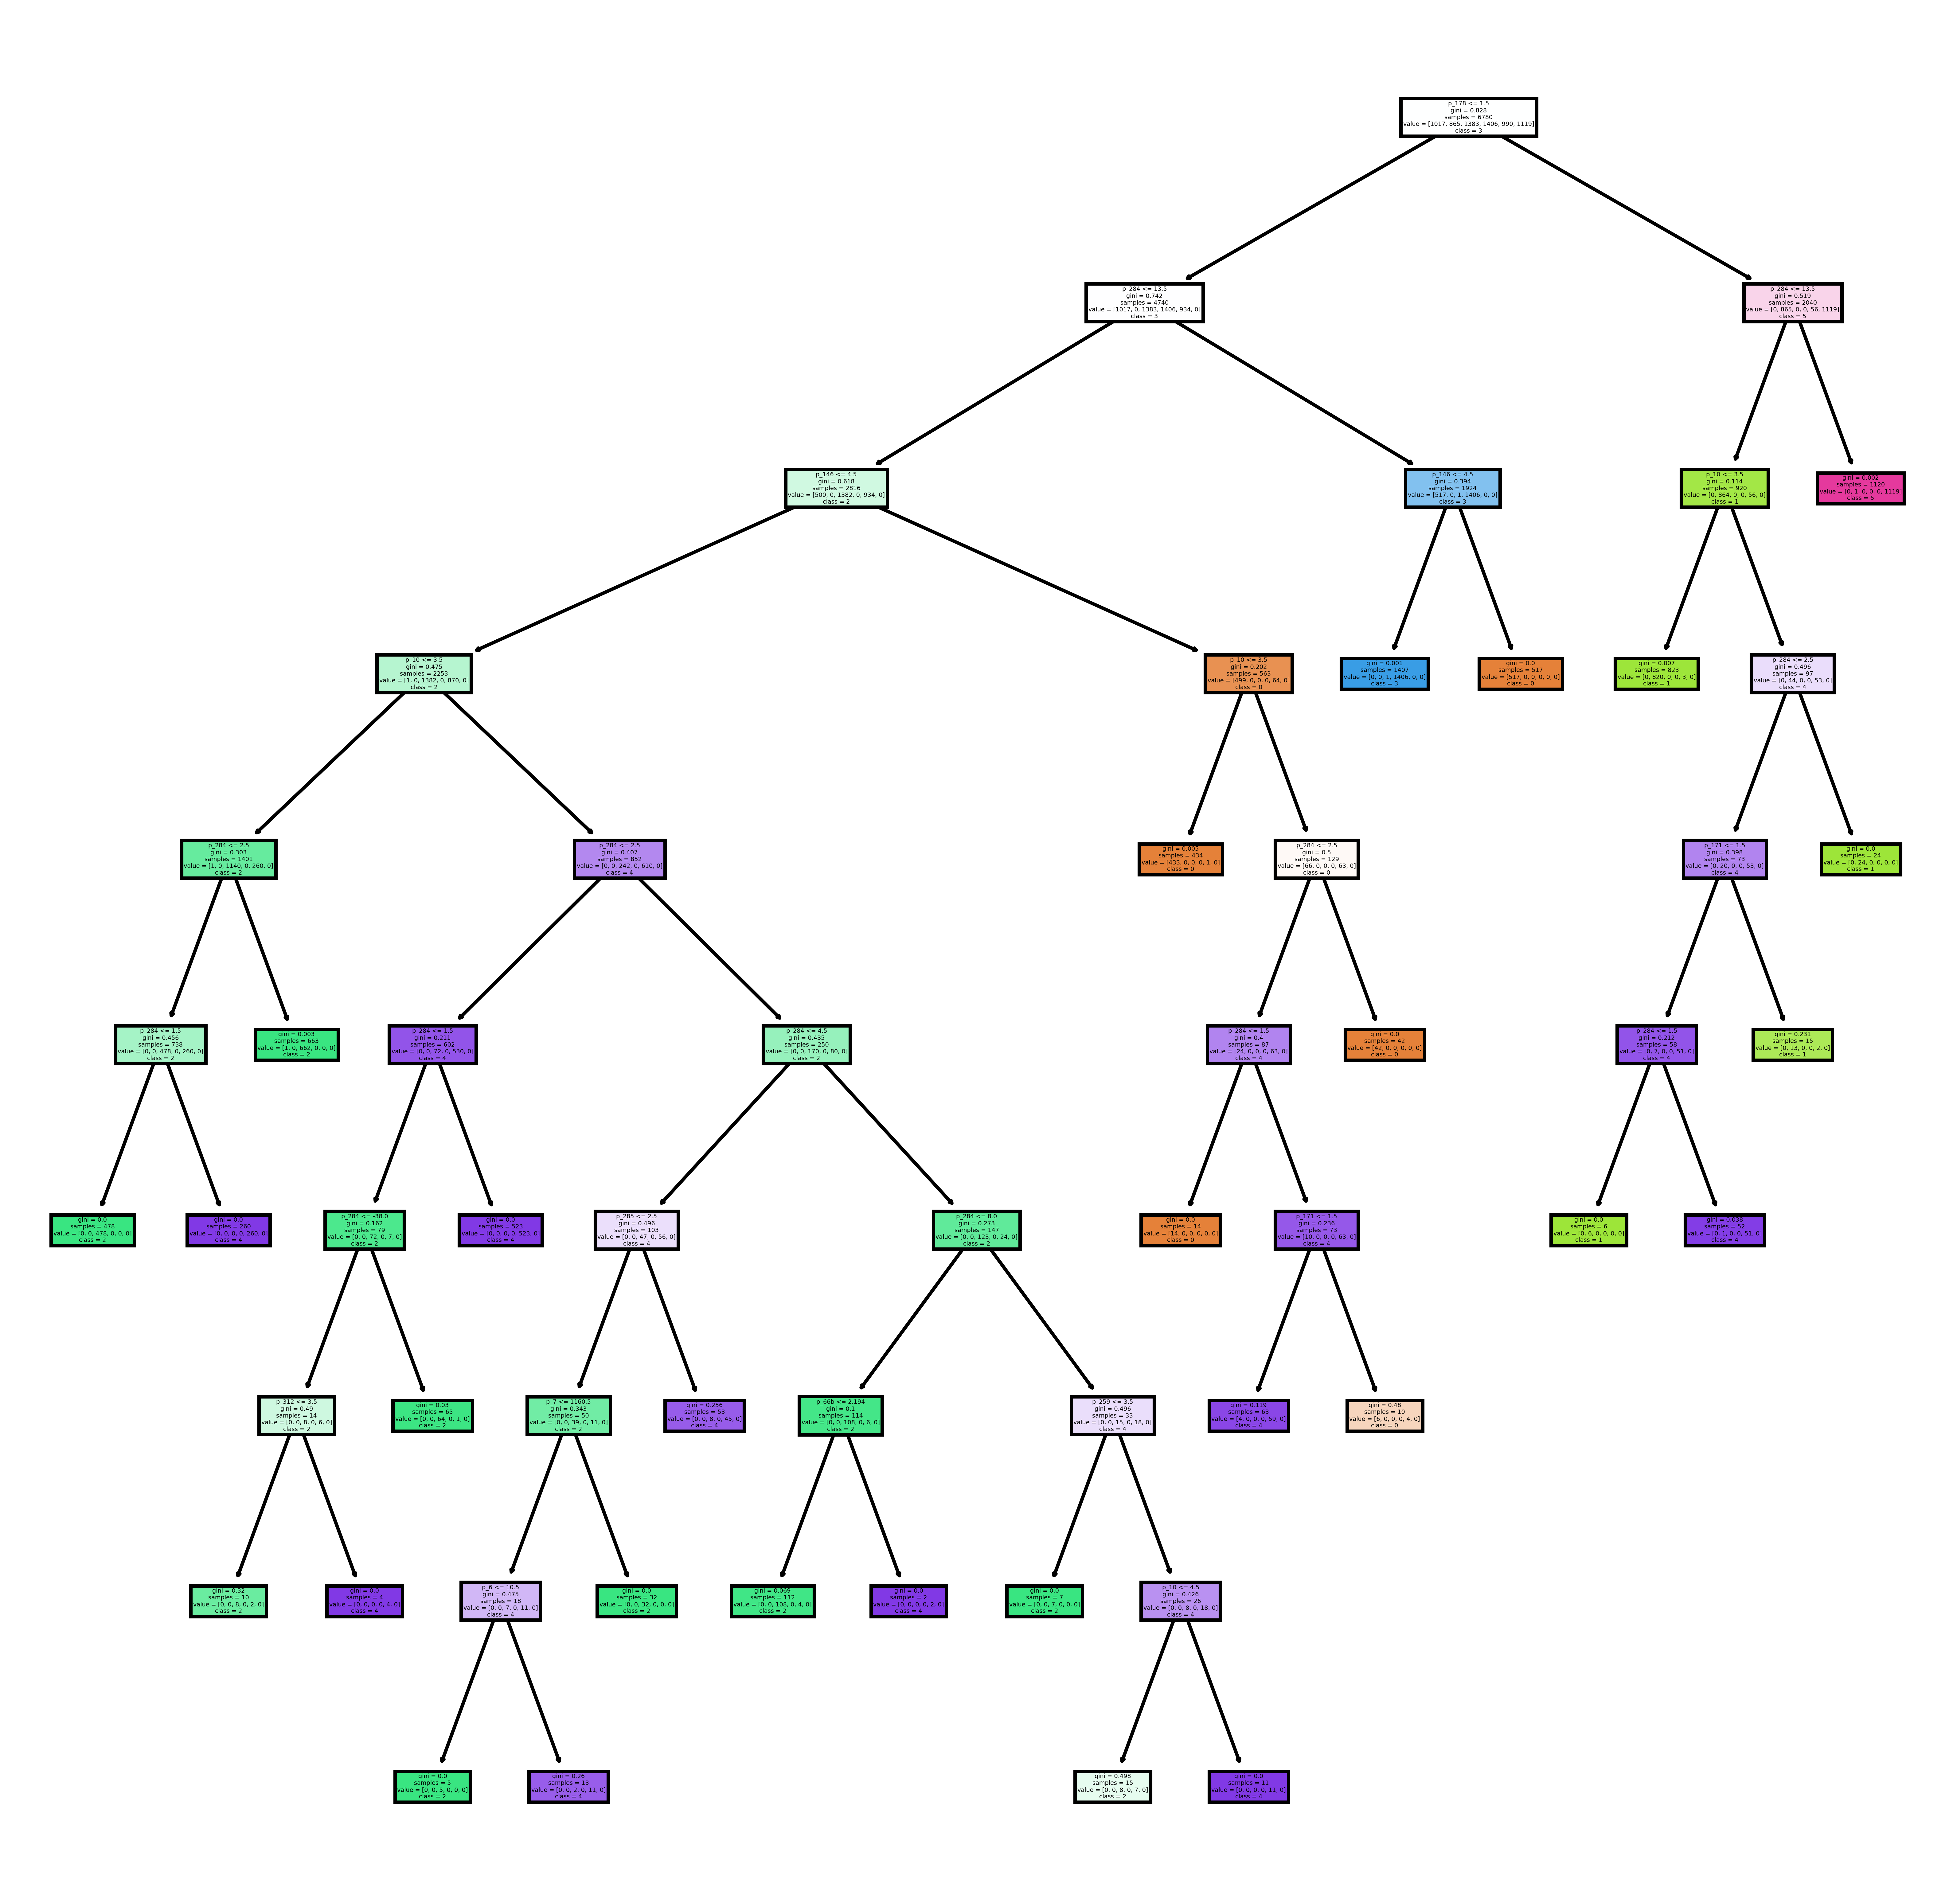

In [232]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10,10), dpi=800)
tree.plot_tree(arbol,
               feature_names = caracter, 
               class_names= clases,
               filled = True);

In [233]:
df_resul= pd.DataFrame()
df_resul['valores']=arbol.feature_importances_
df_resul['labels']=caracter
caract=df_resul.shape[0]

In [234]:
orden = df_resul.sort_values(by='valores', ascending=False)
orden = orden[orden['valores'] > 0.0001]
caract=orden.shape[0]
orden

valores labels
14  0.492258  p_284
4   0.236610  p_146
12  0.187391  p_178
1   0.072025   p_10
15  0.003672  p_285
10  0.003288  p_171
0   0.001552    p_7
75  0.000953  p_259
2   0.000933    p_6
80  0.000660  p_312
37  0.000659  p_66b

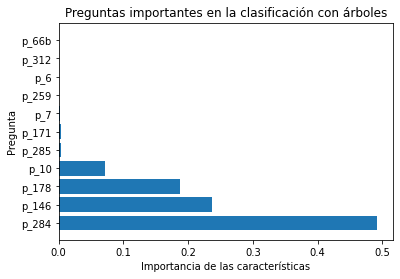

In [235]:
plt.barh(range(caract),orden.valores)
plt.yticks(np.arange(caract), orden.labels)
plt.xlabel('Importancia de las características')
plt.ylabel('Pregunta')
plt.title('Preguntas importantes en la clasificación con árboles')
plt.show()

In [236]:
#df_resul.sort_values(by=['valores'], inplace=True, ascending=False)
#df_resul

In [237]:
# Reporte de métricas 
y_pred = arbol.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       443
           1       1.00      1.00      1.00       857
           2       0.98      0.98      0.98       372
           3       0.97      1.00      0.99        38
           4       0.95      0.94      0.95       303
           5       1.00      1.00      1.00       247

    accuracy                           0.98      2260
   macro avg       0.98      0.98      0.98      2260
weighted avg       0.98      0.98      0.98      2260



In [238]:
#Error datos entrenamiento. 1.0 -> Overfitted
#is measuring the accuracy of the model against the training data.
arbol.score(X_entrena, y_entrena)

0.9938053097345133

In [239]:
#Error de las pruebas
arbol.score(X_test, y_test)

0.9845132743362832

In [240]:
#Matriz de confusión. La diagonal muestra las predicciones correctas
y_pred = arbol.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[437,   0,   1,   0,   5,   0],
       [  0, 854,   1,   0,   2,   0],
       [  0,   0, 365,   0,   7,   0],
       [  0,   0,   0,  38,   0,   0],
       [  9,   4,   5,   0, 285,   0],
       [  0,   0,   0,   1,   0, 246]])

In [241]:
tabla1 = pd.DataFrame(columns = ['Clasificación','Modelo', 'Data','Score testeo', 'Score entrenamiento'])
tabla1.loc[1] = ["Kmeans", "Árboles de decisión","DF Original - 92 variables",arbol.score(X_test, y_test),arbol.score(X_entrena, y_entrena)] 
tabla1

Clasificación               Modelo  ... Score testeo  Score entrenamiento
1        Kmeans  Árboles de decisión  ...     0.984513             0.993805

[1 rows x 5 columns]

A continuación se realizará árboles decisión, pero solo para el resultado obtenido de FAMD (17 componentes)

In [ ]:
famd_df=pd.read_csv('/content/gdrive/My Drive/calidad_de_vida_medellin/github/Data/Results/R1-FAMD.csv', sep=";")
famd_df = famd_df.drop(['Unnamed: 0'], axis=1)

In [ ]:
X = famd_df
X

0           1           2  ...          14         15          16
0     706.382955   66.447949 -176.416984  ...  -21.824624 -13.164383   47.538097
1     706.462001   62.251976 -179.738342  ...  -11.328938  -8.438203   28.497294
2     705.514790  -13.007778 -233.079339  ...   74.890595  87.383974   -8.319981
3     704.675862   51.975137 -181.238170  ...   16.781343 -33.050359   15.116963
4     705.677585  -13.310417 -233.897851  ...   78.141090  87.910226   -8.595724
...          ...         ...         ...  ...         ...        ...         ...
9035  662.886350   12.984775  207.283401  ...   -7.855694   2.188530   -1.172873
9036  557.463161  -64.672615  100.653070  ...  -46.258395   9.890505  -17.687361
9037  470.205768  260.957595  -83.360498  ...   16.339208 -28.678088  189.545769
9038  471.597666  147.749449  249.267411  ... -147.086424   9.669678   30.365164
9039  606.393139   52.323574  207.791351  ...  -14.554665 -12.951346  -36.192661

[9040 rows x 17 columns]

In [ ]:
y = kml

In [ ]:
#por defecto test = 25% de los datos
X_entrena, X_test, y_entrena, y_test = train_test_split(X,y, shuffle=False,random_state = 17, test_size=0.25)

In [ ]:
arbol=DecisionTreeClassifier(random_state = 17, min_impurity_decrease=0.0005)

In [ ]:
arbol.fit(X_entrena, y_entrena)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0005, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=17, splitter='best')

In [ ]:
df1 = famd_df.iloc[:,0:17]
caracter = df1.columns #nombres de las features
df1.columns

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16'],
      dtype='object')

In [ ]:
clases = ['0','1','2','3','4','5'] #quitar nombres duplicados

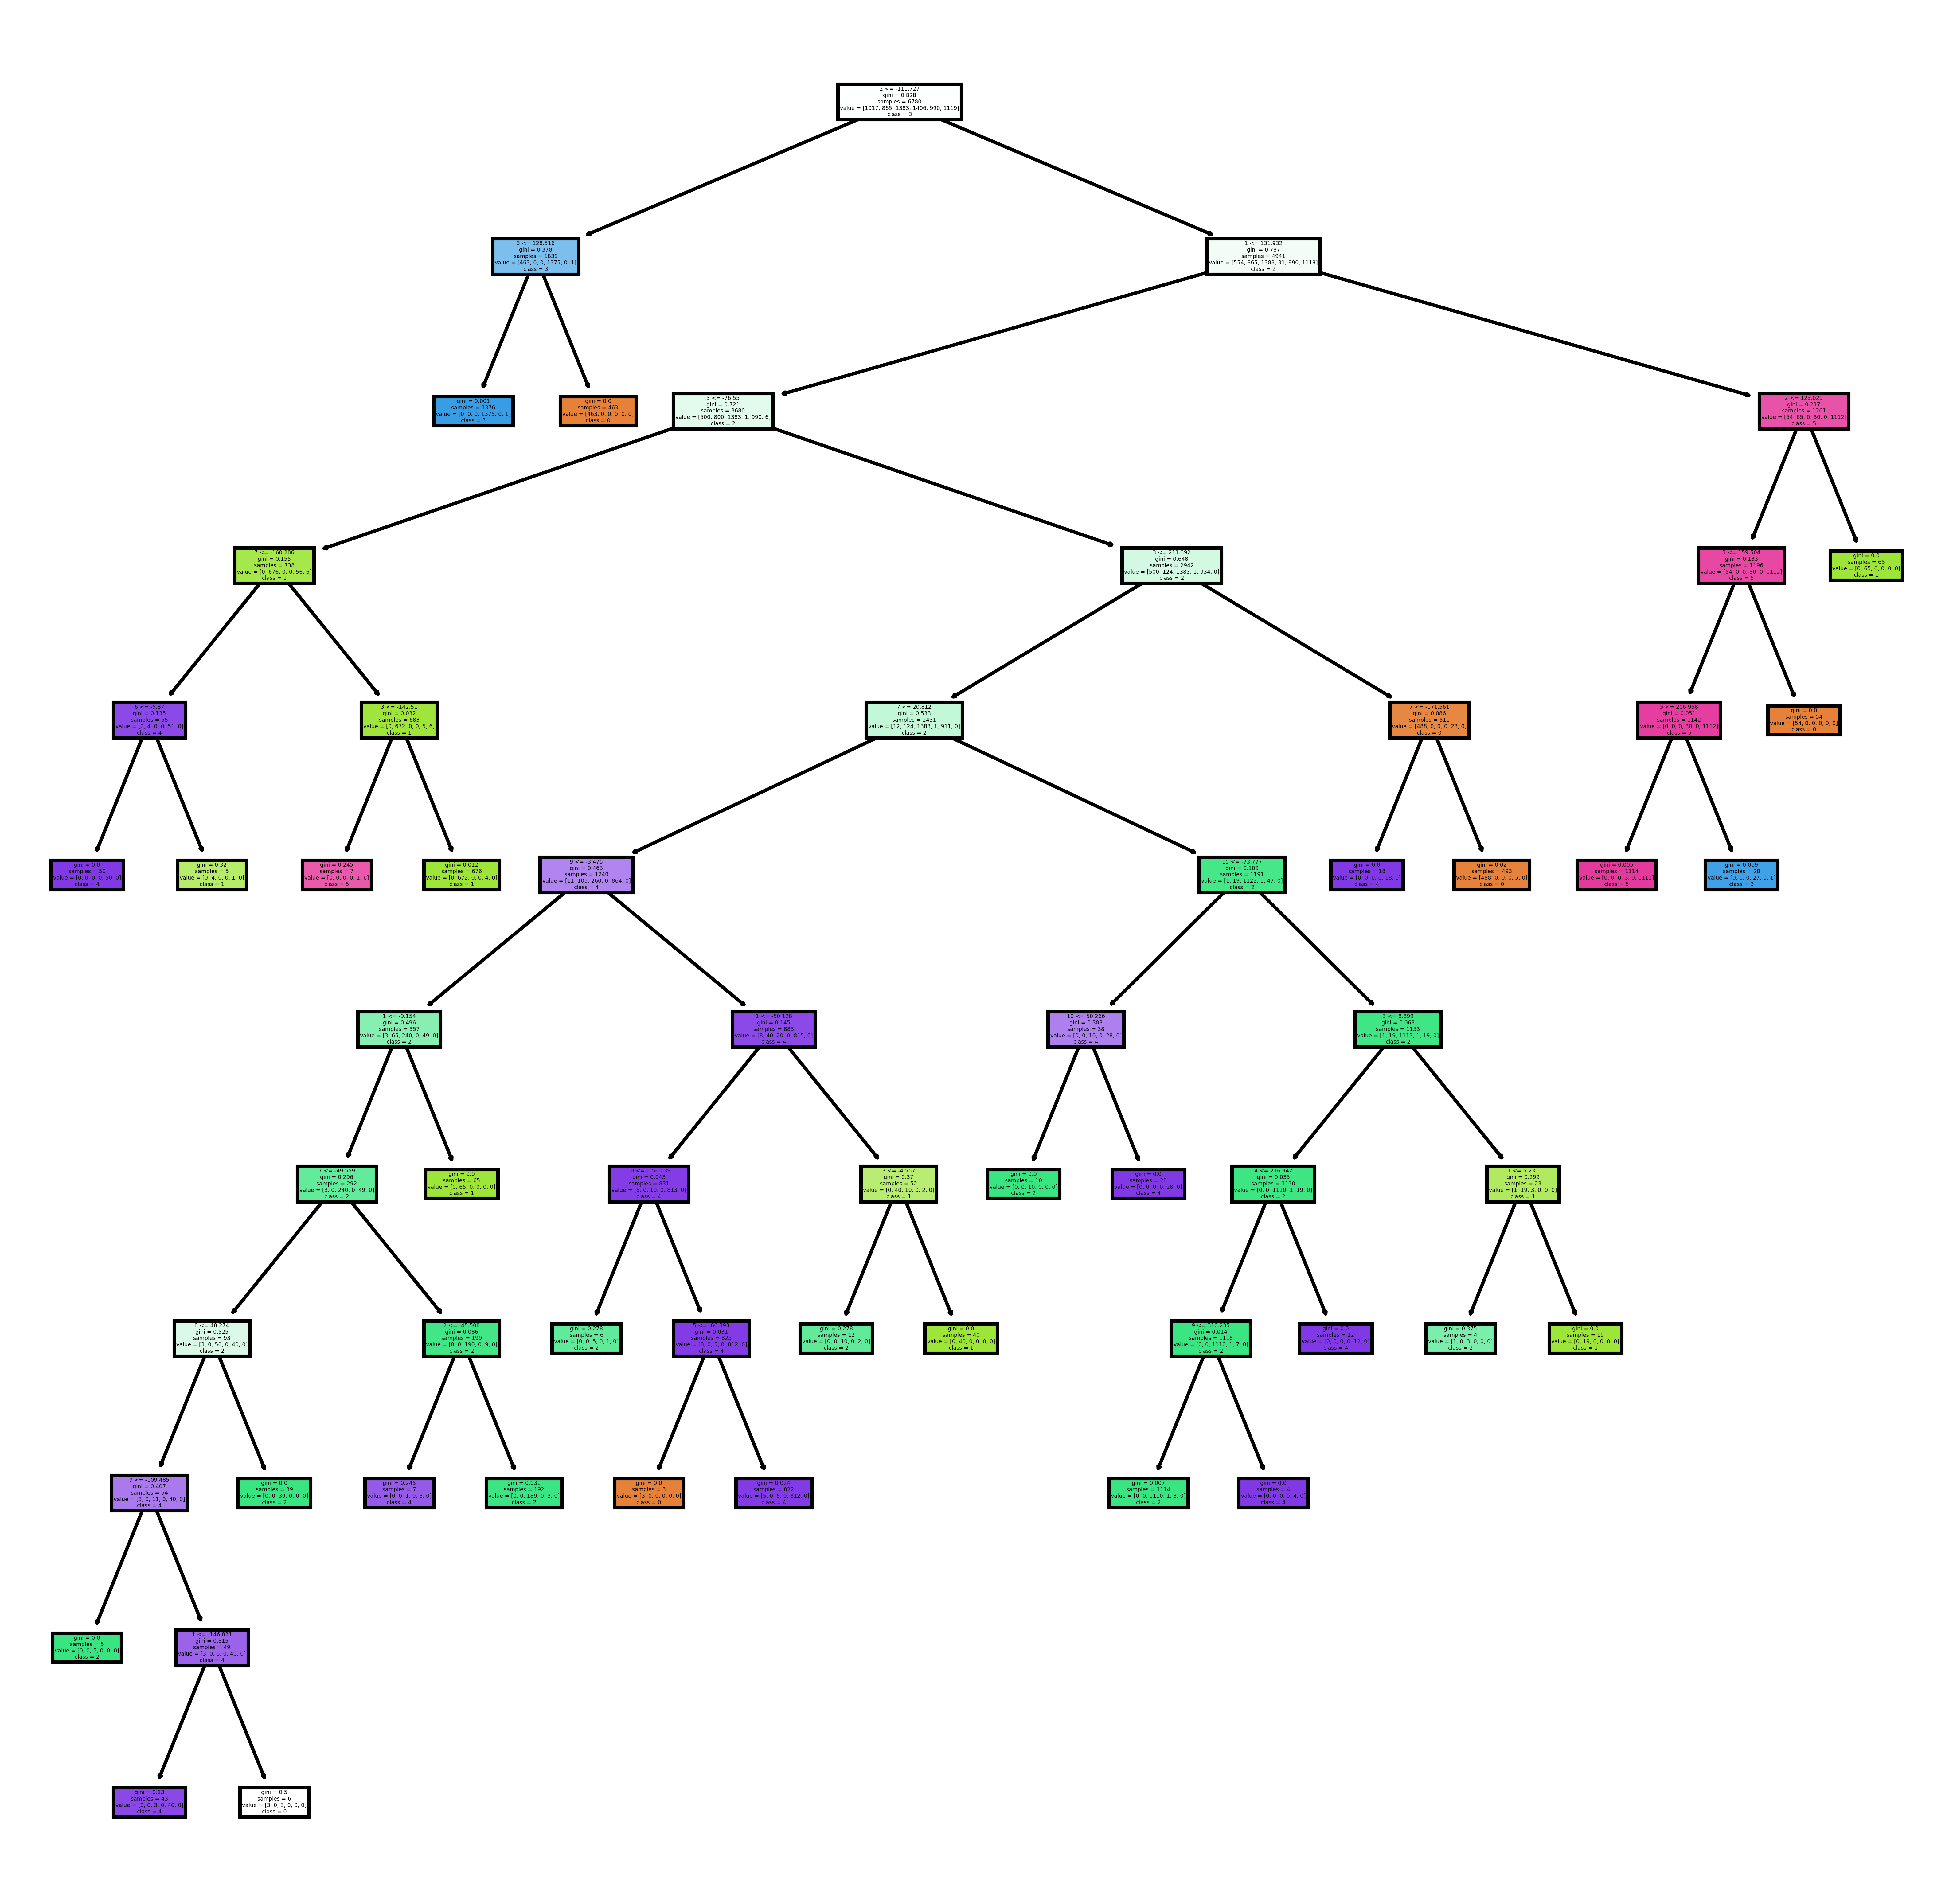

In [ ]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10,10), dpi=800)
tree.plot_tree(arbol,
               feature_names = caracter, 
               class_names= clases,
               filled = True);

In [ ]:
df_resul = pd.DataFrame()
df_resul['valores']=arbol.feature_importances_
df_resul['labels']=caracter

In [ ]:
df_resul.sort_values(by=['valores'], inplace=True, ascending=False)
df_resul

valores labels
3   0.370495      3
2   0.208883      2
1   0.205930      1
7   0.132279      7
9   0.051231      9
5   0.010191      5
15  0.006730     15
8   0.004854      8
4   0.004234      4
10  0.004120     10
6   0.001052      6
13  0.000000     13
14  0.000000     14
0   0.000000      0
12  0.000000     12
11  0.000000     11
16  0.000000     16

In [ ]:
# Reporte de métricas 
y_pred = arbol.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       443
           1       0.99      0.99      0.99       857
           2       0.96      0.97      0.97       372
           3       0.84      0.95      0.89        38
           4       0.95      0.89      0.92       303
           5       0.98      0.97      0.97       247

    accuracy                           0.97      2260
   macro avg       0.95      0.96      0.95      2260
weighted avg       0.97      0.97      0.97      2260



In [ ]:
#Error datos entrenamiento. 1.0 -> Overfitted
#is measuring the accuracy of the model against the training data.
arbol.score(X_entrena, y_entrena)

0.9935103244837759

In [ ]:
#Error de las pruebas
arbol.score(X_test, y_test)

0.9712389380530974

In [ ]:
#Matriz de confusión. La diagonal muestra las predicciones correctas
y_pred = arbol.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[439,   2,   0,   0,   2,   0],
       [  0, 849,   2,   0,   2,   4],
       [  1,   2, 360,   0,   9,   0],
       [  0,   0,   1,  36,   0,   1],
       [ 13,   7,  11,   0, 271,   1],
       [  0,   0,   0,   7,   0, 240]])

In [ ]:
tabla1.loc[2] = ["Kmeans", "Árboles de decisión","FAMD - 17 componentes",arbol.score(X_test, y_test),arbol.score(X_entrena, y_entrena)] 
tabla1

Clasificación               Modelo  ... Score testeo  Score entrenamiento
1        Kmeans  Árboles de decisión  ...     0.984513             0.993805
2        Kmeans  Árboles de decisión  ...     0.971239             0.993510

[2 rows x 5 columns]

###**Kmedoids**

Inicialmente, se aplicará considerando el dataset original que contiene las 489 variables. Incluye variables dummies

Para esto, se carga el archivo obtenido de Kmedoids

In [ ]:
dffkmed=pd.read_csv('/content/gdrive/My Drive/calidad_de_vida_medellin/github/Data/Results/R2-K-med.csv', sep=",")

Se extrae la columna donde se encuentra el nivel obtenido de kmedoids

In [ ]:
dff=dffkmed.iloc[:,0:489]
dff = dff.drop(['Unnamed: 0'], axis=1)
dff["p_286_19"].replace(np.nan, 0, inplace=True)
dff["p_286_19"]

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
9035    0.0
9036    0.0
9037    0.0
9038    0.0
9039    0.0
Name: p_286_19, Length: 9040, dtype: float64

A este se aplica la función para organizar los tipos de cada variable

In [ ]:
#Función para forzar tipos, con dummies -> info_condum.csv | sin dummies -> info_sindum.csv
infoTipos = pd.read_csv('/content/gdrive/My Drive/calidad_de_vida_medellin/github/Docs/metadata_directory/info_condum.csv', sep=';')

In [ ]:
dff=forzar_tipos(dff, infoTipos, 1)

In [ ]:
dff.head(10)

p_5_1 p_5_2 p_6_1 p_6_2 p_6_3 p_6_4  ... p_318 p_319 p_320 p_321 p_322 p_323
0     1     0     0     0     1     0  ...     4     4     4     5     4     4
1     1     0     0     0     0     0  ...     4     4     4     4     4     4
2     1     0     0     0     0     0  ...     4     4     4     4     4     4
3     1     0     0     0     0     0  ...     4     4     4     4     4     4
4     1     0     0     0     0     0  ...     4     4     4     4     4     4
5     1     0     0     0     0     0  ...     4     4     4     4     4     4
6     1     0     0     0     0     0  ...     4     4     4     3     4     4
7     1     0     0     0     0     0  ...     4     3     4     4     4     4
8     1     0     0     0     0     0  ...     4     4     4     5     5     4
9     1     0     0     0     0     0  ...     4     4     4     4     4     4

[10 rows x 488 columns]

In [ ]:
X = dff

Asimismo, del resultado de Kmedoids, se extrae la columna de clasificación

In [ ]:
kmedl=dffkmed.iloc[:,489:]
kmedl

etiqueta_km
0               4
1               4
2               2
3               4
4               2
...           ...
9035            3
9036            2
9037            5
9038            3
9039            5

[9040 rows x 1 columns]

In [ ]:
y = kmedl

In [ ]:
#por defecto test = 25% de los datos
X_entrena, X_test, y_entrena, y_test = train_test_split(X,y, shuffle=False,random_state = 17, test_size=0.25)

In [ ]:
arbol=DecisionTreeClassifier(random_state = 17, min_impurity_decrease=0.0005)

In [ ]:
arbol.fit(X_entrena, y_entrena)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0005, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=17, splitter='best')

In [ ]:
dfkme = dff.iloc[:,:]
caracter = dfkme.columns #nombres de las features
caracter

Index(['p_5_1', 'p_5_2', 'p_6_1', 'p_6_2', 'p_6_3', 'p_6_4', 'p_6_5', 'p_6_6',
       'p_6_7', 'p_6_8',
       ...
       'p_314', 'p_315', 'p_316', 'p_317', 'p_318', 'p_319', 'p_320', 'p_321',
       'p_322', 'p_323'],
      dtype='object', length=488)

In [ ]:
clases = ['0','1','2','3','4','5']

In [ ]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (8,8), dpi=800)
tree.plot_tree(arbol,
               feature_names = caracter, 
               class_names= clases,
               filled = True);

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
df_resul = pd.DataFrame()
df_resul['valores']=arbol.feature_importances_
#df_resul['labels']=caracter

In [ ]:
df_resul.sort_values(by=['valores'], inplace=True, ascending=False)
df_resul.head(10)

valores
319  0.169838
356  0.155620
425  0.113596
413  0.079978
3    0.044336
320  0.044129
449  0.036581
13   0.035828
424  0.026933
10   0.022352

In [ ]:
# Reporte de métricas 
y_pred = arbol.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.71      0.69       208
           1       0.68      0.67      0.68       337
           2       0.78      0.82      0.80       344
           3       0.88      0.91      0.89       691
           4       0.69      0.73      0.71       487
           5       0.68      0.41      0.52       193

    accuracy                           0.76      2260
   macro avg       0.73      0.71      0.71      2260
weighted avg       0.76      0.76      0.76      2260



In [ ]:
#Matriz de confusión. La diagonal muestra las predicciones correctas
y_pred = arbol.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[148,  13,  32,   7,   6,   2],
       [ 23, 226,  13,  27,  43,   5],
       [ 26,   0, 281,  11,  24,   2],
       [  2,  37,   3, 630,  15,   4],
       [ 13,  35,  27,  32, 356,  24],
       [  6,  19,   6,  12,  70,  80]])

In [ ]:
tabla1.loc[3] = ["Kmedoids", "Árboles de decisión","DF Original - 488 variables",arbol.score(X_test, y_test),arbol.score(X_entrena, y_entrena)] 
tabla1

Clasificación               Modelo  ... Score testeo  Score entrenamiento
1        Kmeans  Árboles de decisión  ...     0.984513             0.993805
2        Kmeans  Árboles de decisión  ...     0.971239             0.993510
3      Kmedoids  Árboles de decisión  ...     0.761504             0.843363

[3 rows x 5 columns]

A continuación se realizará árboles decisión, pero solo para el resultado obtenido de FAMD (17 componentes)

In [ ]:
X = famd_df

In [ ]:
y = kmedl

In [ ]:
#por defecto test = 25% de los datos
X_entrena, X_test, y_entrena, y_test = train_test_split(X,y, shuffle=False,random_state = 17, test_size=0.25)

In [ ]:
arbol=DecisionTreeClassifier(random_state = 17, min_impurity_decrease=0.0005)

In [ ]:
arbol.fit(X_entrena, y_entrena)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0005, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=17, splitter='best')

In [ ]:
df2 = famd_df.iloc[:,0:17]
caracter = df2.columns #nombres de las features
df1.columns

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16'],
      dtype='object')

In [ ]:
clases = ['0','1','2','3','4','5']

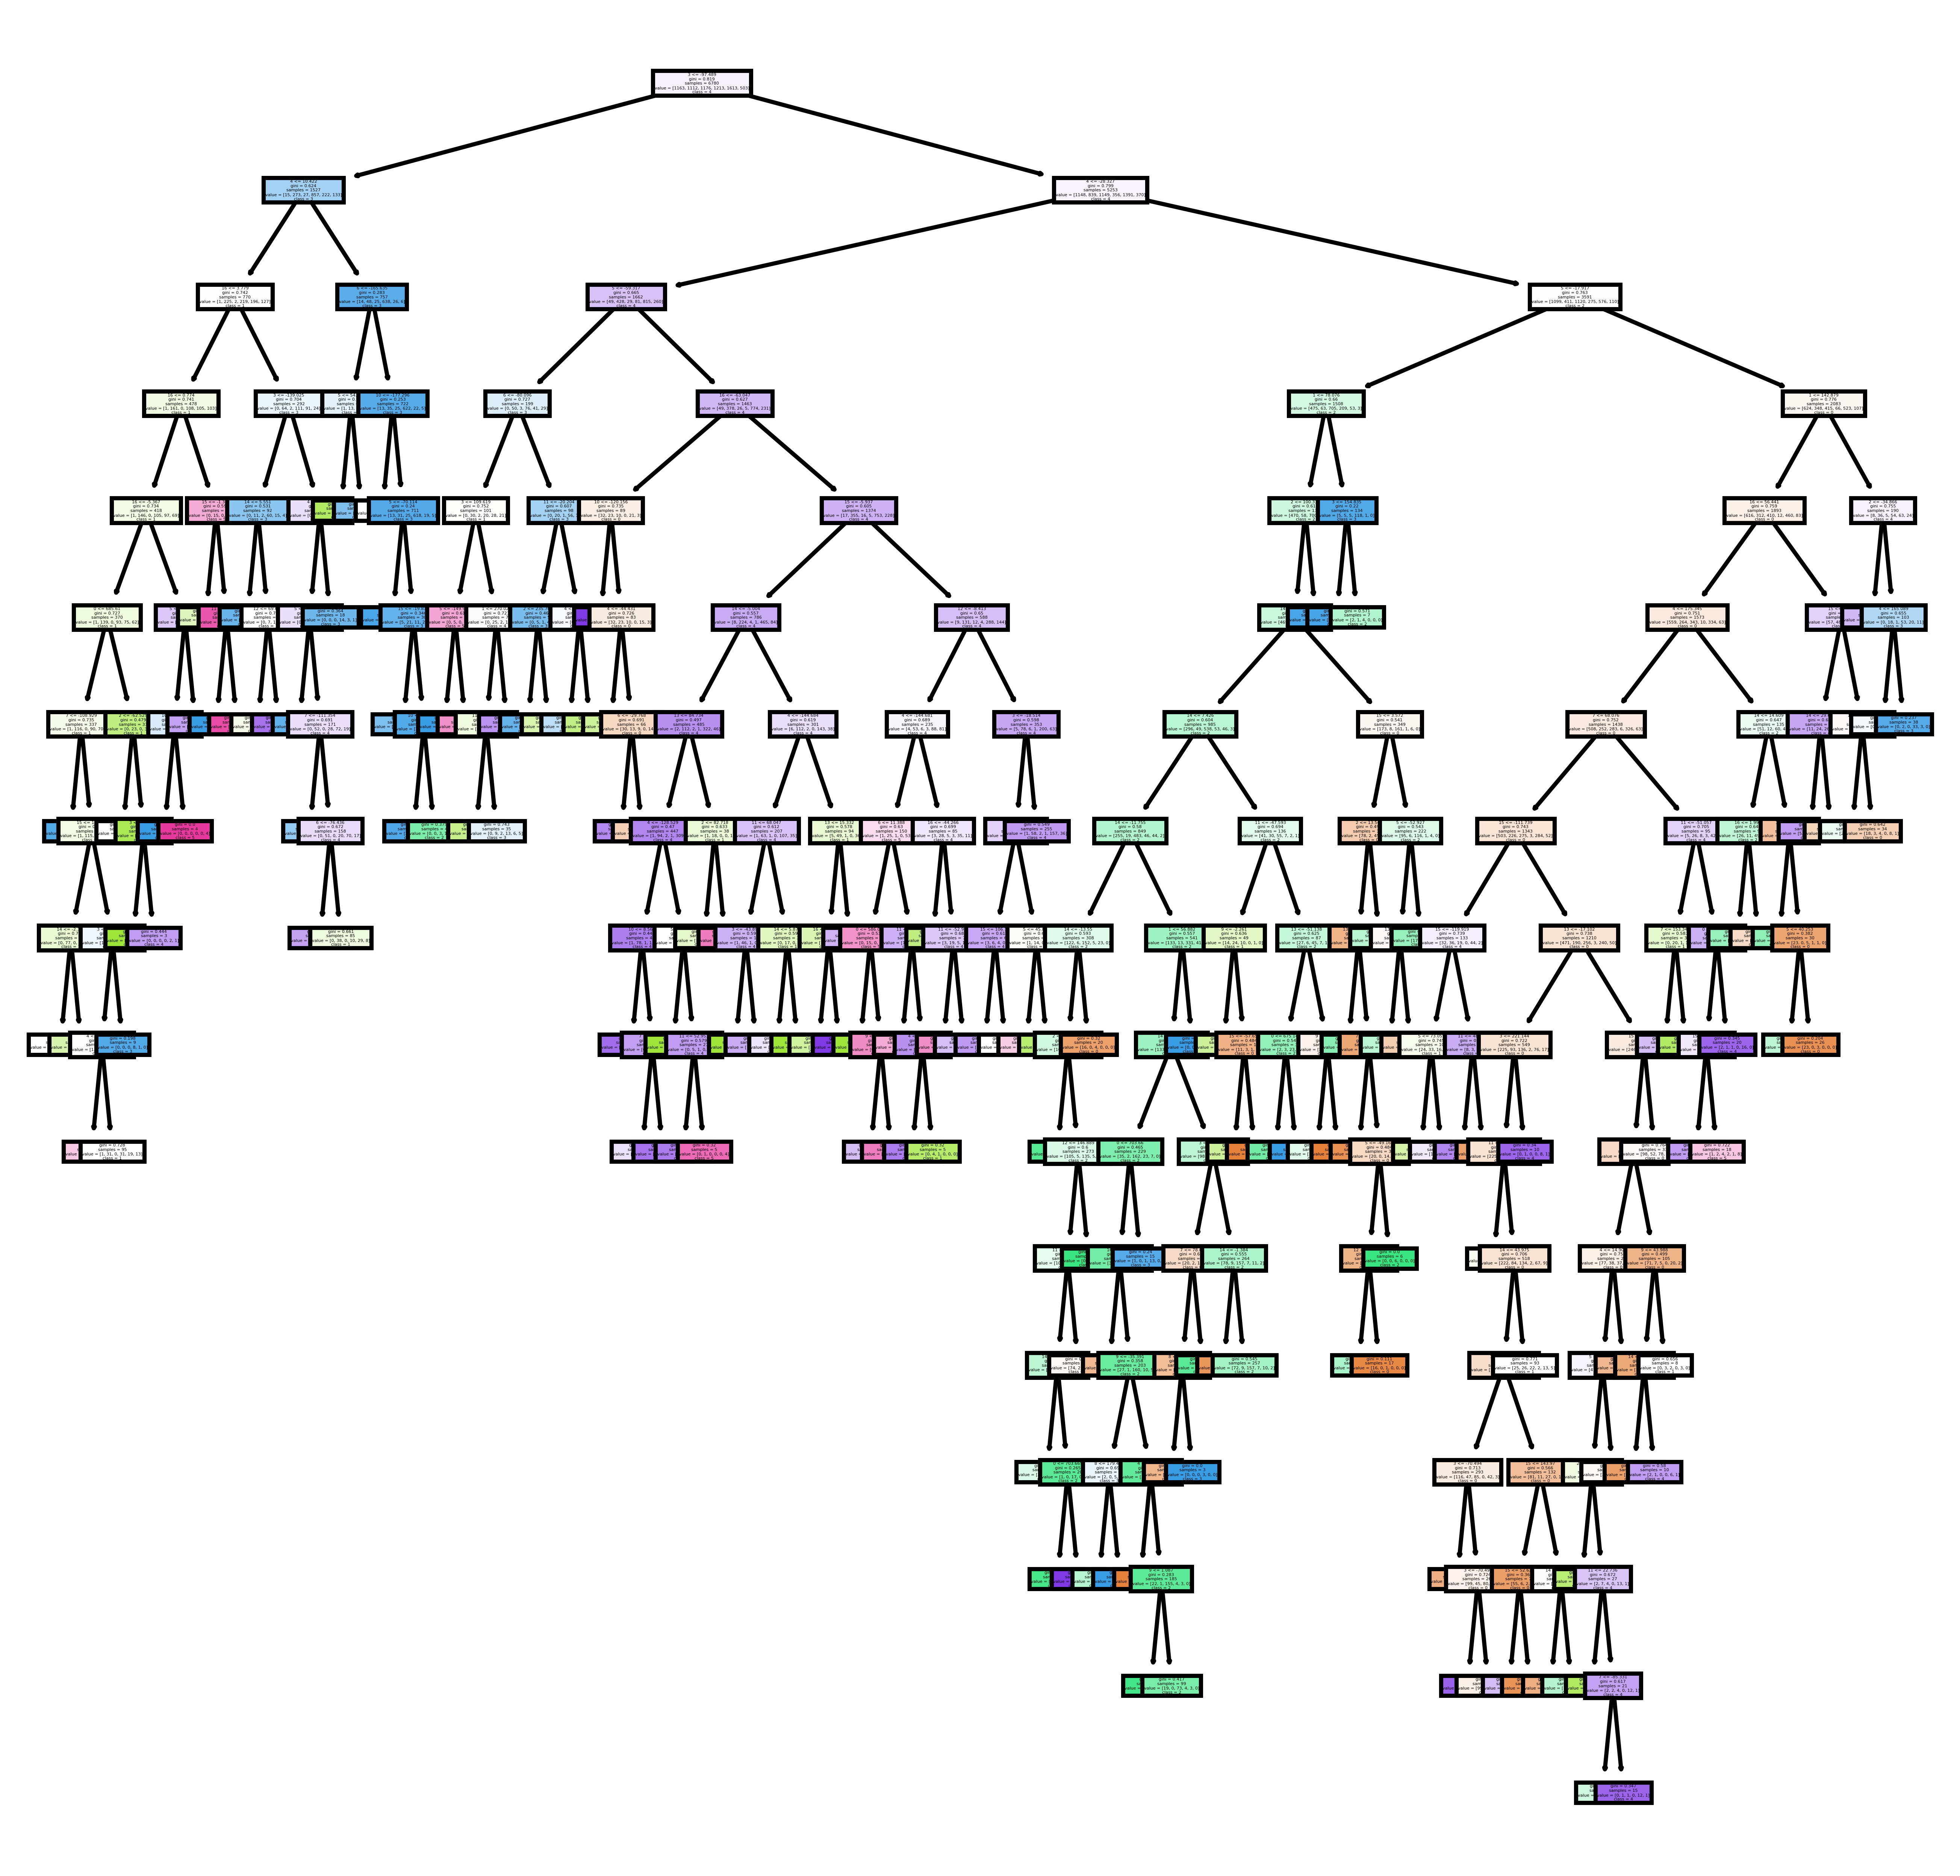

In [ ]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (8,8), dpi=800)
tree.plot_tree(arbol,
               feature_names = caracter, 
               class_names= clases,
               filled = True);

In [ ]:
df_resul = pd.DataFrame()
df_resul['valores']=arbol.feature_importances_
df_resul['labels']=caracter

In [ ]:
df_resul.sort_values(by=['valores'], inplace=True, ascending=False)
df_resul

valores labels
4   0.275760      4
3   0.216565      3
5   0.108394      5
1   0.079033      1
14  0.050928     14
15  0.042373     15
2   0.040449      2
16  0.040247     16
11  0.031106     11
7   0.022163      7
13  0.019260     13
0   0.018319      0
6   0.017443      6
9   0.013037      9
10  0.011597     10
12  0.009680     12
8   0.003646      8

In [ ]:
# Reporte de métricas 
y_pred = arbol.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.25      0.49      0.33       208
           1       0.26      0.18      0.22       337
           2       0.51      0.41      0.45       344
           3       0.70      0.86      0.78       691
           4       0.45      0.40      0.43       487
           5       0.25      0.09      0.13       193

    accuracy                           0.49      2260
   macro avg       0.41      0.41      0.39      2260
weighted avg       0.47      0.49      0.47      2260



In [ ]:
#Matriz de confusión. La diagonal muestra las predicciones correctas
y_pred = arbol.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[102,  11,  60,   6,  27,   2],
       [ 54,  62,  24,  93,  88,  16],
       [143,  20, 141,  11,  27,   2],
       [ 17,  40,  21, 595,  14,   4],
       [ 71,  70,  24,  99, 196,  27],
       [ 14,  35,   6,  40,  81,  17]])

In [ ]:
tabla1.loc[4] = ["Kmedoids", "Árboles de decisión","FAMD - 17 componentes",arbol.score(X_test, y_test),arbol.score(X_entrena, y_entrena)] 
tabla1

Clasificación               Modelo  ... Score testeo  Score entrenamiento
1        Kmeans  Árboles de decisión  ...     0.984513             0.993805
2        Kmeans  Árboles de decisión  ...     0.971239             0.993510
3      Kmedoids  Árboles de decisión  ...     0.761504             0.843363
4      Kmedoids  Árboles de decisión  ...     0.492478             0.616372

[4 rows x 5 columns]

##**Regresión Logística**

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.graphics.api as smg
from sklearn import model_selection

###**Kmeans**

Se carga el archivo de FAMD (C17) más la clasificación de Kmeans

In [ ]:
rl_1=pd.concat([famd_df, kml], axis=1)

In [ ]:
rl_1.columns = ['C1','C2','C3','C4','C5','C6','C7','C8','C9','C10','C11','C12','C13','C14','C15','C16','C17','K']

In [ ]:
from sklearn.linear_model import LogisticRegression
X1 = rl_1.iloc[:,0:17]
y1 = rl_1['K']
X1=X1.astype(float)
X1_train, X1_test, y1_train, y1_test = model_selection.train_test_split(X1, y1, train_size=0.75)

In [ ]:
model1 = LogisticRegression()

In [ ]:
model1.fit(X1_train, y1_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
LogisticRegression()

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
#Se evalua la suma de cuadrados para ver que tan bueno es el ajuste 
def SSE(residuo):
    return np.sum(residuo**2)

In [ ]:
residuo_del_entrenamiento_1 = y1_train - model1.predict(X1_train)
sse_train_1 = SSE(residuo_del_entrenamiento_1)
sse_train_1

0

In [ ]:
residuo_del_testeo_1 = y1_test - model1.predict(X1_test)
sse_test_1 = SSE(residuo_del_testeo_1)
sse_test_1

46

In [ ]:
coefs_1 = np.count_nonzero(model1.coef_)
coefs_1

102

In [ ]:
score_1=model1.score(X1, y1)
score_1

0.9994469026548672

In [ ]:
tabla = pd.DataFrame(columns = ['Clasificación','Modelo','Res_Error_Ent', 'Res_Error_Test','Coef','score'])
tabla.loc[1] = ["Kmeans", "Regresión logística", sse_train_1, sse_test_1,coefs_1,score_1] 
tabla

Clasificación               Modelo  ... Coef     score
1        Kmeans  Regresión logística  ...  102  0.999447

[1 rows x 6 columns]

In [ ]:
from sklearn.metrics import classification_report
y1_pred = model1.predict(X1_test)
print(classification_report(y1_test, y1_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       381
           1       1.00      1.00      1.00       424
           2       1.00      1.00      1.00       422
           3       1.00      1.00      1.00       361
           4       0.99      1.00      0.99       326
           5       1.00      1.00      1.00       346

    accuracy                           1.00      2260
   macro avg       1.00      1.00      1.00      2260
weighted avg       1.00      1.00      1.00      2260



A continuación se presenta la matriz de confusión, donde la diagonal muestra las predicciones correctas

In [ ]:
from sklearn.metrics import confusion_matrix
y1_pred = model1.predict(X1_test)
cnf_matrix_1=confusion_matrix(y1_test, y1_pred) 
cnf_matrix_1

array([[379,   0,   0,   0,   2,   0],
       [  0, 424,   0,   0,   0,   0],
       [  0,   0, 420,   1,   1,   0],
       [  0,   0,   0, 361,   0,   0],
       [  0,   1,   0,   0, 325,   0],
       [  0,   0,   0,   0,   0, 346]])

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

Text(0.5, 1.0, 'Matriz de confusión Kmeans')

<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

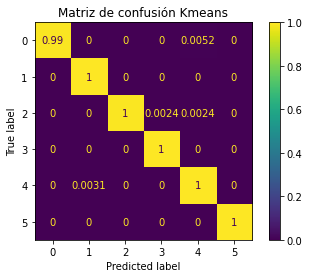

In [ ]:
plt.figure()
plt.figure(figsize=(8, 6))
plot_confusion_matrix(model1, X1_test, y1_test, normalize= 'true')
plt.title('Matriz de confusión Kmeans')

Se evidencia la presencia de overfitting, por lo que se aplicará Lasso

####**Lasso**

In [ ]:
from sklearn import linear_model

In [ ]:
model2 = linear_model.LassoCV()
X2 = rl_1.iloc[:,0:17]
y2 = rl_1['K'].astype("object")
X2=X2.astype(float)
X2_train, X2_test, y2_train, y2_test = model_selection.train_test_split(X2, y2, train_size=0.75)
model2.fit(X2, y2)

LassoCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
        max_iter=1000, n_alphas=100, n_jobs=None, normalize=False,
        positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)

In [ ]:
model2.alpha_

0.8435534872590844

In [ ]:
residuo_del_entrenamiento_2 = y2_train - model2.predict(X2_train)
sse_train_2 = SSE(residuo_del_entrenamiento_2)
sse_train_2

8569.496149225524

In [ ]:
residuo_del_testeo_2 = y2_test - model2.predict(X2_test)
sse_test_2 = SSE(residuo_del_testeo_2)
sse_test_2

2835.211811400416

In [ ]:
coefs_2 = np.count_nonzero(model2.coef_)
coefs_2

14

In [ ]:
score_2=model2.score(X2, y2)
score_2

0.5461306007493169

In [ ]:
tabla.loc[2] = ["Kmeans","Lasso", sse_train_2, sse_test_2,coefs_2,score_2] 
tabla

Clasificación               Modelo  ... Coef     score
1        Kmeans  Regresión logística  ...  102  0.999447
2        Kmeans                Lasso  ...   14  0.546131

[2 rows x 6 columns]

####**Ridge**

In [ ]:
model3 = linear_model.Ridge()
X3 = rl_1.iloc[:,0:17]
y3 = rl_1['K'].astype("object")
X3=X3.astype(float)
X3_train, X3_test, y3_train, y3_test = model_selection.train_test_split(X3, y3, train_size=0.75)
model3.fit(X3, y3)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [ ]:
residuo_del_entrenamiento_3 = y3_train - model3.predict(X3_train)
sse_train_3 = SSE(residuo_del_entrenamiento_3)
sse_train_3

8457.433876075338

In [ ]:
residuo_del_testeo_3 = y3_test - model3.predict(X3_test)
sse_test_3 = SSE(residuo_del_testeo_3)
sse_test_3

2934.6541322659014

In [ ]:
coefs_3 = np.count_nonzero(model3.coef_)
coefs_3

17

In [ ]:
score_3=model3.score(X3, y3)
score_3

0.5466328328259127

In [ ]:
tabla.loc[3] = ["Kmeans","Lasso", sse_train_3, sse_test_3,coefs_3,score_3] 
tabla

Clasificación               Modelo  ... Coef     score
1        Kmeans  Regresión logística  ...  102  0.999447
2        Kmeans                Lasso  ...   14  0.546131
3        Kmeans                Lasso  ...   17  0.546633

[3 rows x 6 columns]

###**Kmedoids**

In [ ]:
rl_2=pd.concat([famd_df, kmedl], axis=1)
rl_2.columns = ['C1','C2','C3','C4','C5','C6','C7','C8','C9','C10','C11','C12','C13','C14','C15','C16','C17','K']

In [ ]:
from sklearn.linear_model import LogisticRegression
X4 = rl_2.iloc[:,0:17]
y4 = rl_2['K']
X4=X4.astype(float)
y4=y4.astype('int')
X4_train, X4_test, y4_train, y4_test = model_selection.train_test_split(X4, y4, train_size=0.75)

In [ ]:
model4 = LogisticRegression()

In [ ]:
model4.fit(X4_train, y4_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
LogisticRegression()

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
#Se evalua la suma de cuadrados para ver que tan bueno es el ajuste 
def SSE(residuo):
    return np.sum(residuo**2)

In [ ]:
residuo_del_entrenamiento_4 = y4_train - model3.predict(X4_train)
sse_train_4 = SSE(residuo_del_entrenamiento_4)
sse_train_4

27740.899178825523

In [ ]:
residuo_del_testeo_4 = y4_test - model4.predict(X4_test)
sse_test_4 = SSE(residuo_del_testeo_4)
sse_test_4

6445

In [ ]:
coefs_4 = np.count_nonzero(model4.coef_)
coefs_4

102

In [ ]:
score_4=model4.score(X4, y4)
score_4

0.5251106194690266

In [ ]:
tabla.loc[4] = ["Kmedoid","Regresión logística", sse_train_4, sse_test_4,coefs_4,score_4] 
tabla

Clasificación               Modelo  ... Coef     score
1        Kmeans  Regresión logística  ...  102  0.999447
2        Kmeans                Lasso  ...   14  0.546131
3        Kmeans                Lasso  ...   17  0.546633
4       Kmedoid  Regresión logística  ...  102  0.525111

[4 rows x 6 columns]

In [ ]:
from sklearn.metrics import classification_report
y4_pred = model4.predict(X4_test)
print(classification_report(y4_test, y4_pred))

              precision    recall  f1-score   support

           0       0.38      0.43      0.40       348
           1       0.35      0.16      0.22       388
           2       0.49      0.68      0.57       362
           3       0.74      0.81      0.77       455
           4       0.48      0.65      0.55       517
           5       0.00      0.00      0.00       190

    accuracy                           0.51      2260
   macro avg       0.41      0.45      0.42      2260
weighted avg       0.46      0.51      0.47      2260



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.metrics import confusion_matrix
y4_pred = model4.predict(X4_test)
cnf_matrix_4=confusion_matrix(y4_test, y4_pred) 
cnf_matrix_4

array([[148,   1, 167,   7,  25,   0],
       [ 69,  64,  31,  47, 177,   0],
       [ 83,   0, 245,  10,  24,   0],
       [  0,  44,  21, 368,  22,   0],
       [ 75,  34,  35,  39, 334,   0],
       [ 10,  39,   0,  25, 116,   0]])

Text(0.5, 1.0, 'Matriz de confusión Kmedoids')

<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

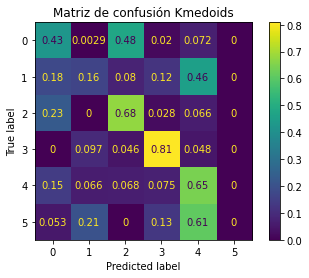

In [ ]:
plt.figure()
plt.figure(figsize=(8, 6))
plot_confusion_matrix(model4, X4_test, y4_test, normalize= 'true')
plt.title('Matriz de confusión Kmedoids')

En este caso, no se observa la presencia de overfitting por lo que no se aplicará Lasso

##**Naïve Bayes**

In [ ]:
!pip install --upgrade category_encoders

     |████████████████████████████████| 81kB 2.1MB/s 


In [242]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for data visualization purposes
import seaborn as sns # for statistical data visualization
import category_encoders
%matplotlib inline

In [243]:
# import category encoders
import category_encoders as ce

###**Kmeans**

In [244]:
kml=kml

In [245]:
dff=dff1

In [246]:
# find categorical variables
categorical = [var for var in dff.columns if dff[var].dtype=='O']
print('Hay {} variables categórias\n'.format(len(categorical)))
print('Las variables categoricas son:\n\n', categorical)

Hay 17 variables categórias

Las variables categoricas son:

 ['p_7', 'p_10', 'p_6', 'p_5', 'p_146', 'p_147', 'p_148', 'p_158', 'p_162', 'p_165', 'p_171', 'p_174', 'p_178', 'p_184', 'p_284', 'p_285', 'p_286']


In [247]:
# check for cardinality in categorical variables
for var in categorical:  
    print(var, ' contiene ', len(dff[var].unique()), ' etiquetas')

p_7  contiene  294  etiquetas
p_10  contiene  6  etiquetas
p_6  contiene  21  etiquetas
p_5  contiene  2  etiquetas
p_146  contiene  5  etiquetas
p_147  contiene  11  etiquetas
p_148  contiene  7  etiquetas
p_158  contiene  1  etiquetas
p_162  contiene  2  etiquetas
p_165  contiene  2  etiquetas
p_171  contiene  2  etiquetas
p_174  contiene  2  etiquetas
p_178  contiene  2  etiquetas
p_184  contiene  4  etiquetas
p_284  contiene  15  etiquetas
p_285  contiene  16  etiquetas
p_286  contiene  20  etiquetas


In [248]:
#Declare feature vector and target variable 
X = dff
y = kml

In [249]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [250]:
# check the shape of X_train and X_test
X_train.shape, X_test.shape

((6780, 92), (2260, 92))

In [251]:
# display categorical variables
categorical = [col for col in X_train.columns if X_train[col].dtypes == 'O']
categorical

['p_7',
 'p_10',
 'p_6',
 'p_5',
 'p_146',
 'p_147',
 'p_148',
 'p_158',
 'p_162',
 'p_165',
 'p_171',
 'p_174',
 'p_178',
 'p_184',
 'p_284',
 'p_285',
 'p_286']

In [252]:
# encode remaining variables with one-hot encoding
encoder = ce.OneHotEncoder(cols=['p_7',
 'p_10',
 'p_6',
 'p_5',
 'p_146',
 'p_147',
 'p_148',
 'p_158',
 'p_162',
 'p_165',
 'p_171',
 'p_174',
 'p_178',
 'p_184',
 'p_284',
 'p_285',
 'p_286'])

In [253]:
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

In [254]:
# check the shape of X_train and X_test
X_train.shape, X_test.shape

((6780, 485), (2260, 485))

Feature Scaling

In [255]:
cols = X_train.columns

In [256]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [257]:
X_train = pd.DataFrame(X_train, columns=[cols])

In [258]:
X_test = pd.DataFrame(X_test, columns=[cols])

In [259]:
X_train.head()

p_7_1 p_7_2 p_7_3 p_7_4 p_7_5 p_7_6  ... p_318 p_319 p_320 p_321 p_322 p_323
0   1.0   0.0   0.0   0.0   0.0   0.0  ...  -2.0  -2.0  -0.5  -1.0  -1.0   0.0
1   0.0   1.0   0.0   0.0   0.0   0.0  ...   0.0   0.0  -1.0   0.0   0.0   0.0
2   0.0   0.0   1.0   0.0   0.0   0.0  ...  -1.0  -1.0   0.0  -1.0  -1.0   0.0
3   0.0   0.0   0.0   1.0   0.0   0.0  ...   0.0  -2.0  -0.5  -1.0   0.0   0.0
4   0.0   0.0   0.0   0.0   1.0   0.0  ...   1.0   1.0   1.0   0.0  -1.0   0.0

[5 rows x 485 columns]

In [260]:
# train a Gaussian Naive Bayes classifier on the training set
from sklearn.naive_bayes import GaussianNB
# instantiate the model
gnb = GaussianNB()
# fit the model
gnb.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB(priors=None, var_smoothing=1e-09)

In [261]:
#Predict the results
y_pred = gnb.predict(X_test)
y_pred

array([2, 0, 3, ..., 1, 1, 1])

In [262]:
from sklearn.metrics import accuracy_score
print('Precisión del modelo: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Precisión del modelo: 0.9212


In [263]:
y_pred_train = gnb.predict(X_train)
y_pred_train

array([1, 0, 2, ..., 5, 0, 0])

In [264]:
print('Precisión del modelo (conjunto de entrenamiento): {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Precisión del modelo (conjunto de entrenamiento): 0.9369


In [265]:
# print the scores on training and test set
print('Score conjunto de entrenamiento: {:.4f}'.format(gnb.score(X_train, y_train)))
print('Score conjunto de entrenamiento: {:.4f}'.format(gnb.score(X_test, y_test)))

Score conjunto de entrenamiento: 0.9369
Score conjunto de entrenamiento: 0.9212


In [266]:
y_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2260 entries, 3449 to 4429
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   kmeans_label  2260 non-null   int64
dtypes: int64(1)
memory usage: 35.3 KB


In [267]:
# check class distribution in test set
pd.value_counts(y_test.values.flatten())

2    464
1    411
3    362
0    353
5    342
4    328
dtype: int64

In [268]:
# check class distribution in test set
pd.value_counts(y_train.values.flatten())

1    1311
2    1291
0    1107
3    1082
5    1024
4     965
dtype: int64

In [269]:
# Print the Confusion Matrix and slice it into four pieces
from sklearn.metrics import confusion_matrix
y_pred = gnb.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[302,   0,   1,   0,  42,   8],
       [  0, 359,   1,   0,  51,   0],
       [  2,   0, 411,   0,  51,   0],
       [  0,   0,   0, 356,   0,   6],
       [  1,   0,  15,   0, 312,   0],
       [  0,   0,   0,   0,   0, 342]])

Text(0.5, 1.0, 'Matriz de confusión Naive Bayes')

<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

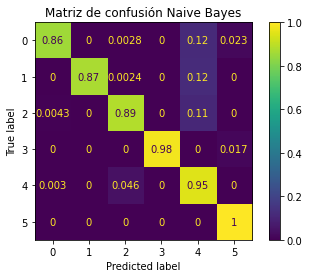

In [270]:
plt.figure()
plt.figure(figsize=(8, 6))
plot_confusion_matrix(gnb, X_test, y_test, normalize= 'true')
plt.title('Matriz de confusión Naive Bayes')

In [271]:
tabla1 = pd.DataFrame(columns = ['Clasificación','Modelo', 'Data','Score testeo', 'Score entrenamiento'])
tabla1.loc[2] = ["Kmeans", "Naive Bayes","DF Original - 92 variables", gnb.score(X_test, y_test),gnb.score(X_train, y_train)] 
tabla1

Clasificación       Modelo  ... Score testeo  Score entrenamiento
2        Kmeans  Naive Bayes  ...     0.921239             0.936873

[1 rows x 5 columns]